In [2]:
from kan import *
import torch
import matplotlib.pyplot as plt
from torch import autograd
from tqdm import tqdm
from pyscf import gto, scf
from collections import Counter

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(device)

In [3]:
# Total number of electrons
total_electrons = 1
total_electrons

NUM_ELECTRONS = total_electrons
INPUT_DIM = NUM_ELECTRONS
OUTPUT_DIM = NUM_ELECTRONS


# Create MultKAN model with specified widths
# Create the initial MultKAN model
#model = MultKAN(width=[INPUT_DIM, 1], grid=5, k=5, seed=42) #, mult_arity=3)
model = KAN(width=[1,1], grid=5, k=3, seed=0)

# Create dataset
f = lambda x: torch.exp(-1*x[:,[0]]) / (torch.tensor(np.sqrt(np.pi)))
dataset = create_dataset(f, n_var=INPUT_DIM, ranges=[0,1], train_num=10000)
print("Dataset shapes:", dataset['train_input'].shape, dataset['train_label'].shape)

checkpoint directory created: ./model
saving model version 0.0
Dataset shapes: torch.Size([10000, 1]) torch.Size([10000, 1])


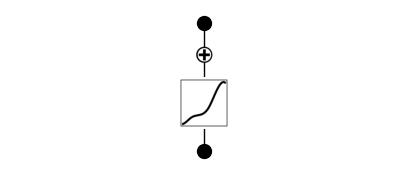

In [4]:
model(dataset['train_input'])
model.plot(beta=10)

In [5]:
model.fit(dataset, steps=100, lamb=0.001);

| train_loss: 4.15e-03 | test_loss: 4.22e-03 | reg: 2.11e+00 | : 100%|█| 100/100 [00:02<00:00, 35.61

saving model version 0.1


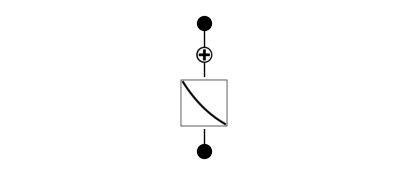

In [6]:
model.plot()

In [7]:
grids = np.array([3,10,20,50])

train_losses = []
test_losses = []
steps = 20

for i in range(grids.shape[0]):
        model = model.refine(grids[i])
        results = model.fit(dataset, opt="LBFGS", steps=steps)
        train_losses += results['train_loss']
        test_losses += results['test_loss']

saving model version 0.2


| train_loss: 3.91e-06 | test_loss: 3.86e-06 | reg: 2.15e+00 | : 100%|█| 20/20 [00:00<00:00, 35.60it


saving model version 0.3
saving model version 0.4


| train_loss: 5.40e-08 | test_loss: 5.23e-08 | reg: 2.15e+00 | : 100%|█| 20/20 [00:00<00:00, 20.30it


saving model version 0.5
saving model version 0.6


| train_loss: 5.17e-08 | test_loss: 5.14e-08 | reg: 2.15e+00 | : 100%|█| 20/20 [00:01<00:00, 17.26it


saving model version 0.7
saving model version 0.8


| train_loss: 1.05e-07 | test_loss: 9.45e-08 | reg: 2.15e+00 | : 100%|█| 20/20 [00:01<00:00, 10.57it

saving model version 0.9


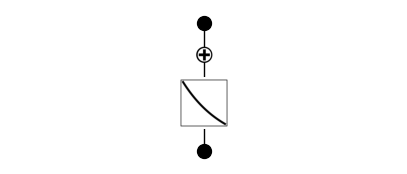

In [8]:
model.plot()

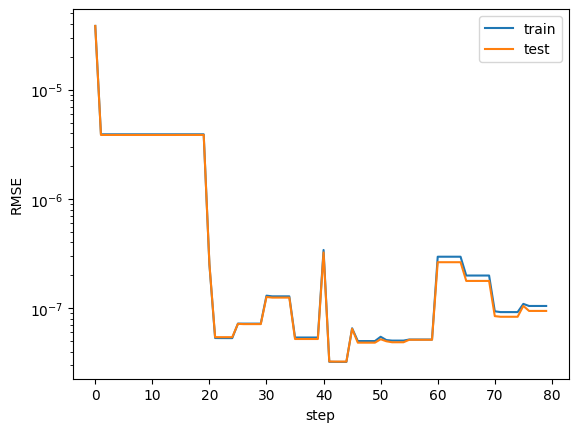

In [9]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

In [10]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin')
    model.fix_symbolic(0,1,0,'x^2')
    model.fix_symbolic(1,0,0,'exp')
elif mode == "auto":
    # automatic mode
    lib = ['exp', 'x', 'x^2']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with exp, r2=1.0000004768371582, c=2
saving model version 0.10


In [11]:
sf = model.symbolic_formula()[0][0]

In [12]:
nsimplify(ex_round(sf, 4))

9/29929 + 5639*exp(-x_1)/10000

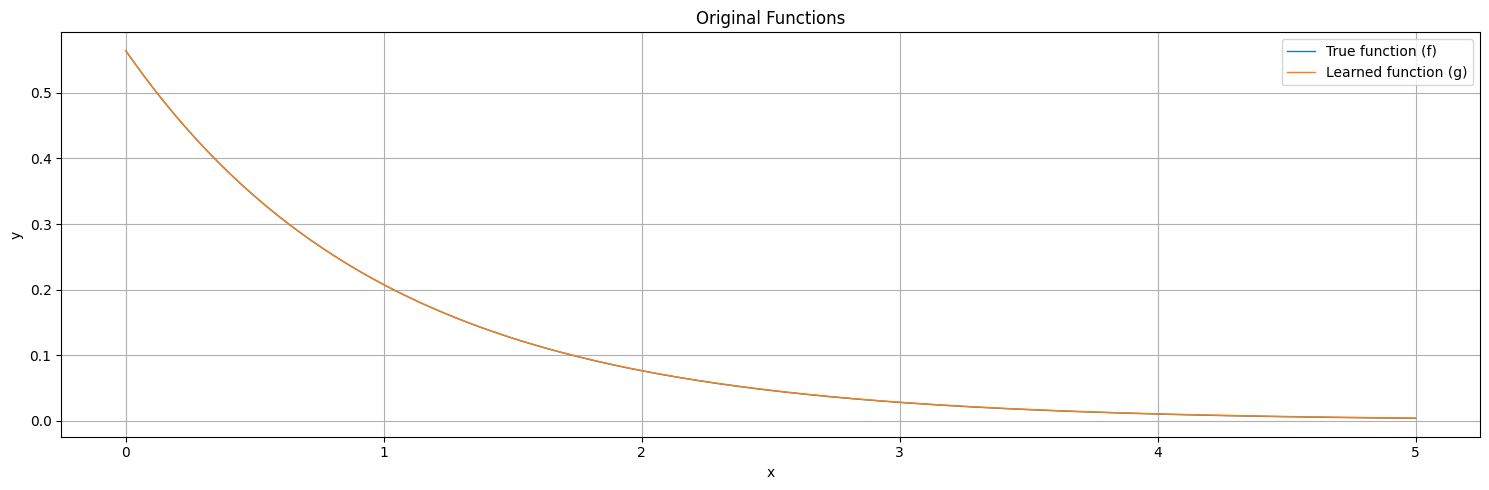

Mean Squared Error: 0.0000000642


In [13]:
x = np.linspace(0, 5, 1000).reshape(-1, 1)

# Regular functions
f = np.exp(-x) / np.sqrt(np.pi)
g = 9/29929 + (5639/10000) * np.exp(-x)

# Squared functions
f_squared = f**2
g_squared = g**2

# Create subplots
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 5))

# Regular functions plot
ax1.plot(x, f, label='True function (f)', linewidth=1)
ax1.plot(x, g, label='Learned function (g)', linewidth=1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Original Functions')
ax1.legend()
ax1.grid(True)

plt.tight_layout()
plt.show()

# Calculate and print MSE
mse = np.mean((f - g) ** 2)
print(f"Mean Squared Error: {mse:.10f}")